# Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

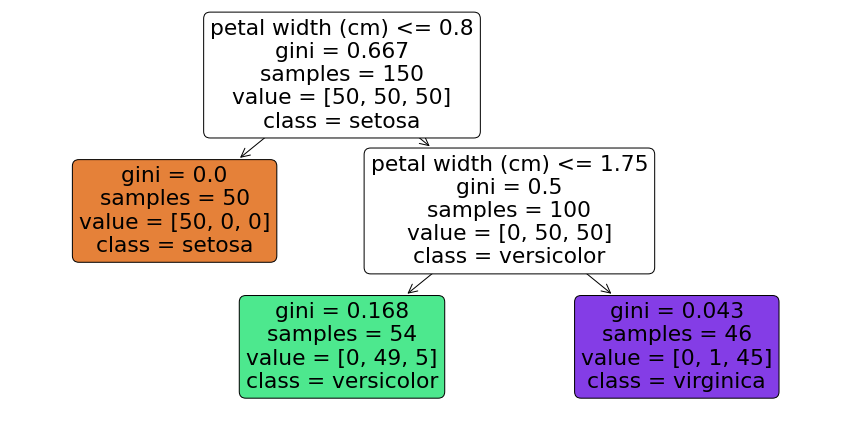

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7.5))
plot_tree(tree_clf, 
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True,
          filled=True)
plt.show()

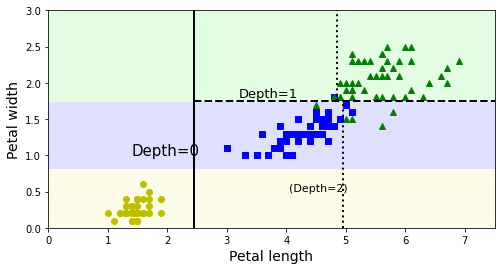

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

---

## Exercise 

In [7]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

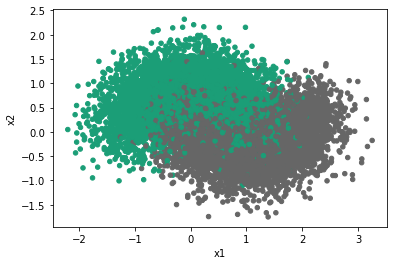

In [8]:
X, y = make_moons(n_samples=10000, noise=0.4)
X = pd.DataFrame(X, columns = ["x1", "x2"])
X.plot.scatter("x1", "x2", c = y, colormap = "Dark2", colorbar = False)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

### Cost-complexity pruning

In [12]:
clf_dt = DecisionTreeClassifier(random_state=42)

In [13]:
path = clf_dt.cost_complexity_pruning_path(train_X, train_y)

In [14]:
ccp_alphas = path.ccp_alphas

In [15]:
from sklearn.model_selection import cross_val_score

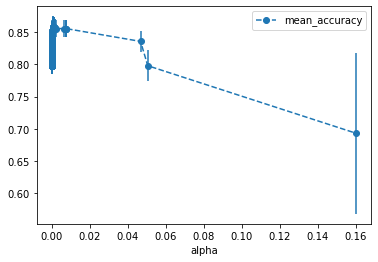

In [16]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, train_X, train_y, cv=10)
    clf_dts.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(clf_dts, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
clf_dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
clf_dt_grid.fit(train_X, train_y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   10.3s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [18]:
clf_dt_grid.best_params_

{'max_leaf_nodes': 16, 'min_samples_split': 2}

In [19]:
from sklearn.metrics import accuracy_score

pred_y = clf_dt_grid.predict(test_X)
accuracy_score(test_y, pred_y)

0.8696

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree

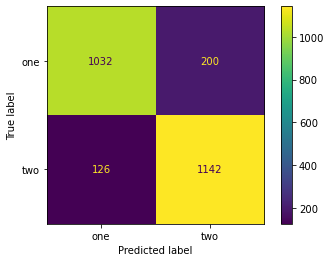

In [21]:
plot_confusion_matrix(clf_dt_grid, test_X, test_y, display_labels=["one", "two"])
plt.show()

In [22]:
clf_dt = DecisionTreeClassifier(max_leaf_nodes=12, min_samples_split=2)
clf_dt.fit(train_X, train_y)

DecisionTreeClassifier(max_leaf_nodes=12)

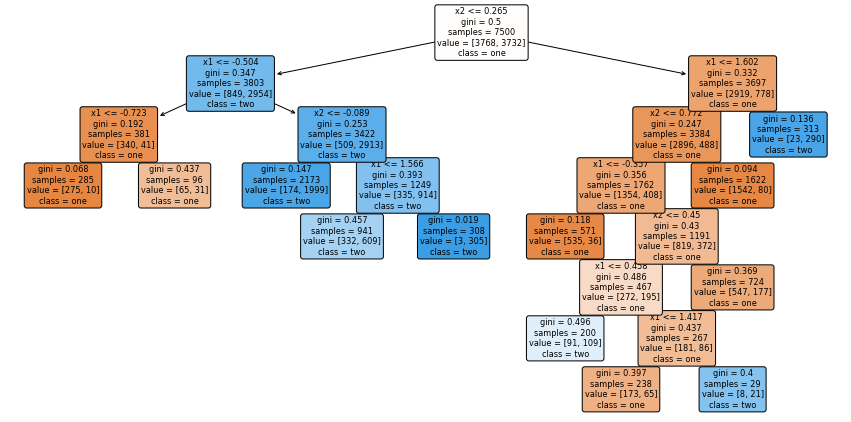

In [23]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
         filled=True,
         rounded=True,
         class_names=["one", "two"],
         feature_names=train_X.columns);

## Exercise 

In [24]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(train_X) - n_instances, random_state=42)

In [25]:
for mini_train_index, mini_test_index in rs.split(train_X):
    X_mini_train = train_X.iloc[mini_train_index]
    y_mini_train = train_y[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [27]:
from sklearn.base import clone

forest = [clone(clf_dt_grid.best_estimator_) for _ in range(n_trees)]
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    pred_y = tree.predict(test_X)
    accuracy_scores.append(accuracy_score(test_y, pred_y))

In [28]:
np.mean(accuracy_scores)

0.8094816

In [33]:
Y_pred = np.empty([n_trees, len(test_X)], dtype=np.uint8)
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(test_X)

In [35]:
from scipy.stats import mode
y_pred_mv, n_votes = mode(Y_pred, axis=0)

In [36]:
accuracy_score(test_y, y_pred_mv.reshape([-1]))

0.874